## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [7]:

results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.6121 - accuracy: 0.7804 - val_loss: 2.1040 - val_accuracy: 0.4880
Epoch 50/50
50000/50000 [==============================] - 7s 130us/step - loss: 0.5876 - accuracy: 0.7881 - val_loss: 1.9639 - val_accuracy: 0.5030
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

50000/50000 [==============================] - 7s 134us/step - loss: 1.0402 - accuracy: 0.6361 - val_loss: 1.4114 - val_accuracy: 0.5061
Epoch 47/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.0275 - accuracy: 0.6399 - val_loss: 1.3711 - val_accuracy: 0.5271
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.0154 - accuracy: 0.6445 - val_loss: 1.4868 - val_accuracy: 0.4914
Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.0048 - accuracy: 0.6489 - val_loss: 1.3310 - val_accuracy: 0.5308
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.9999 - accuracy: 0.6498 - val_loss: 1.4949 - val_accuracy: 0.4883
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________

Epoch 44/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5804 - accuracy: 0.4480 - val_loss: 1.5962 - val_accuracy: 0.4403
Epoch 45/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5762 - accuracy: 0.4503 - val_loss: 1.5869 - val_accuracy: 0.4505
Epoch 46/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5712 - accuracy: 0.4522 - val_loss: 1.5844 - val_accuracy: 0.4475
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5667 - accuracy: 0.4544 - val_loss: 1.5800 - val_accuracy: 0.4474
Epoch 48/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.5623 - accuracy: 0.4545 - val_loss: 1.5784 - val_accuracy: 0.4479
Epoch 49/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5581 - accuracy: 0.4563 - val_loss: 1.5714 - val_accuracy: 0.4470
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5540 - accuracy: 0.4573

50000/50000 [==============================] - 7s 131us/step - loss: 1.9570 - accuracy: 0.3137 - val_loss: 1.9549 - val_accuracy: 0.3119
Epoch 42/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.9534 - accuracy: 0.3146 - val_loss: 1.9513 - val_accuracy: 0.3141
Epoch 43/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9498 - accuracy: 0.3160 - val_loss: 1.9479 - val_accuracy: 0.3153
Epoch 44/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9463 - accuracy: 0.3180 - val_loss: 1.9443 - val_accuracy: 0.3180
Epoch 45/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.9430 - accuracy: 0.3177 - val_loss: 1.9411 - val_accuracy: 0.3182
Epoch 46/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9397 - accuracy: 0.3206 - val_loss: 1.9378 - val_accuracy: 0.3193
Epoch 47/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9366 - accuracy: 0.3216 - val_loss:

Epoch 39/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2438 - accuracy: 0.1789 - val_loss: 2.2404 - val_accuracy: 0.1887
Epoch 40/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2422 - accuracy: 0.1799 - val_loss: 2.2389 - val_accuracy: 0.1899
Epoch 41/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2406 - accuracy: 0.1812 - val_loss: 2.2373 - val_accuracy: 0.1912
Epoch 42/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.2391 - accuracy: 0.1823 - val_loss: 2.2358 - val_accuracy: 0.1923
Epoch 43/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2376 - accuracy: 0.1835 - val_loss: 2.2343 - val_accuracy: 0.1935
Epoch 44/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2360 - accuracy: 0.1850 - val_loss: 2.2328 - val_accuracy: 0.1949
Epoch 45/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.2345 - accuracy: 0.1868

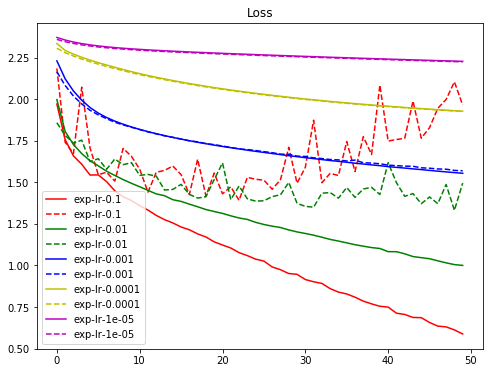

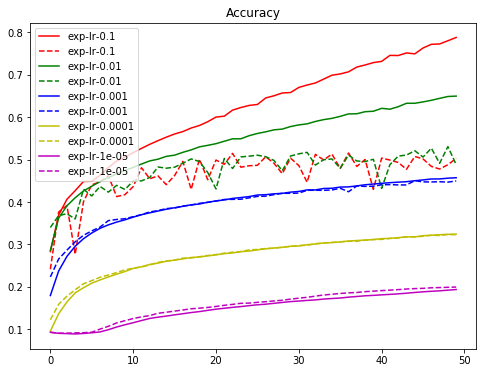

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()